In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df1 = pd.read_csv('index_1.csv')
df2 = pd.read_csv('index_2.csv')

In [4]:
df1

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte
...,...,...,...,...,...,...
3631,2025-03-23,2025-03-23 10:34:54.894,card,ANON-0000-0000-1158,35.76,Cappuccino
3632,2025-03-23,2025-03-23 14:43:37.362,card,ANON-0000-0000-1315,35.76,Cocoa
3633,2025-03-23,2025-03-23 14:44:16.864,card,ANON-0000-0000-1315,35.76,Cocoa
3634,2025-03-23,2025-03-23 15:47:28.723,card,ANON-0000-0000-1316,25.96,Americano


In [5]:
df2

,date,datetime,cash_type,money,coffee_name
0,2025-02-08,2025-02-08 14:26:04,cash,15.0,Tea
1,2025-02-08,2025-02-08 14:28:26,cash,15.0,Tea
2,2025-02-08,2025-02-08 14:33:04,card,20.0,Espresso
3,2025-02-08,2025-02-08 15:51:04,card,30.0,Chocolate with coffee
4,2025-02-08,2025-02-08 16:35:01,cash,27.0,Chocolate with milk
...,...,...,...,...,...
257,2025-03-23,2025-03-23 14:55:46,cash,30.0,Cappuccino
258,2025-03-23,2025-03-23 15:15:36,card,25.0,Irish whiskey
259,2025-03-23,2025-03-23 17:59:25,card,28.0,Super chocolate
260,2025-03-23,2025-03-23 18:01:33,card,28.0,Vanilla with Irish whiskey


In [9]:
df1['date'] = pd.to_datetime(df1['date'], format='%Y-%m-%d')
df1['datetime'] = pd.to_datetime(df1['datetime'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3636 entries, 0 to 3635
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         3636 non-null   datetime64[ns]
 1   datetime     3636 non-null   datetime64[ns]
 2   cash_type    3636 non-null   object        
 3   card         3547 non-null   object        
 4   money        3636 non-null   float64       
 5   coffee_name  3636 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(3)
memory usage: 170.6+ KB


In [10]:
df2['date'] = pd.to_datetime(df2['date'], format='%Y-%m-%d')
df2['datetime'] = pd.to_datetime(df2['datetime'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         262 non-null    datetime64[ns]
 1   datetime     262 non-null    datetime64[ns]
 2   cash_type    262 non-null    object        
 3   money        262 non-null    float64       
 4   coffee_name  262 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(2)
memory usage: 10.4+ KB


In [14]:
df1.isna().sum()
df1['card'] = df1['card'].fillna('Unknown')
df1.isna().sum()

date           0
datetime       0
cash_type      0
card           0
money          0
coffee_name    0
dtype: int64

In [12]:
df2.isna().sum()

date           0
datetime       0
cash_type      0
money          0
coffee_name    0
dtype: int64

In [20]:
coffee_most_popular = df1.groupby('coffee_name')['money'].count().sort_values(ascending=False).head(1)
print(coffee_most_popular)

coffee_name
Americano with Milk    824
Name: money, dtype: int64


In [21]:
coffee_most_popular_2 = df2.groupby('coffee_name')['money'].count().sort_values(ascending=False).head(1)
print(coffee_most_popular_2)

coffee_name
Americano with milk    44
Name: money, dtype: int64


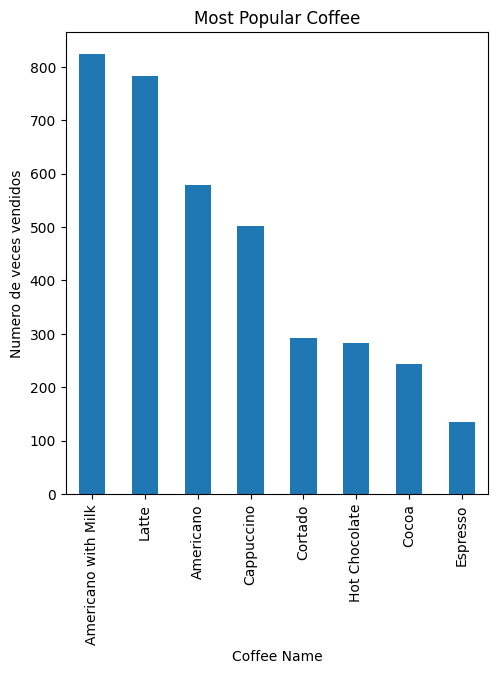

In [62]:
## comparacion de popularidad de cafes
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
df1.groupby('coffee_name')['money'].count().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Most Popular Coffee')
plt.xlabel('Coffee Name')
plt.ylabel('Numero de veces vendidos')

plt.show()

## Cafe mas popular 📊
- • sabemos que el americano con leche es el mas popular entonces necesitamos mayor rotacion de ese cafe

- • el Espresso es el que menos piden entonces podemos hacer una promecion con algun conjunto para que aumente el ticket promedio con el espresso, ya sea un pan, algun snack, o demas

- • si no vemos mejora en el Espresso entoces darle baja y meter algun otra alternativa

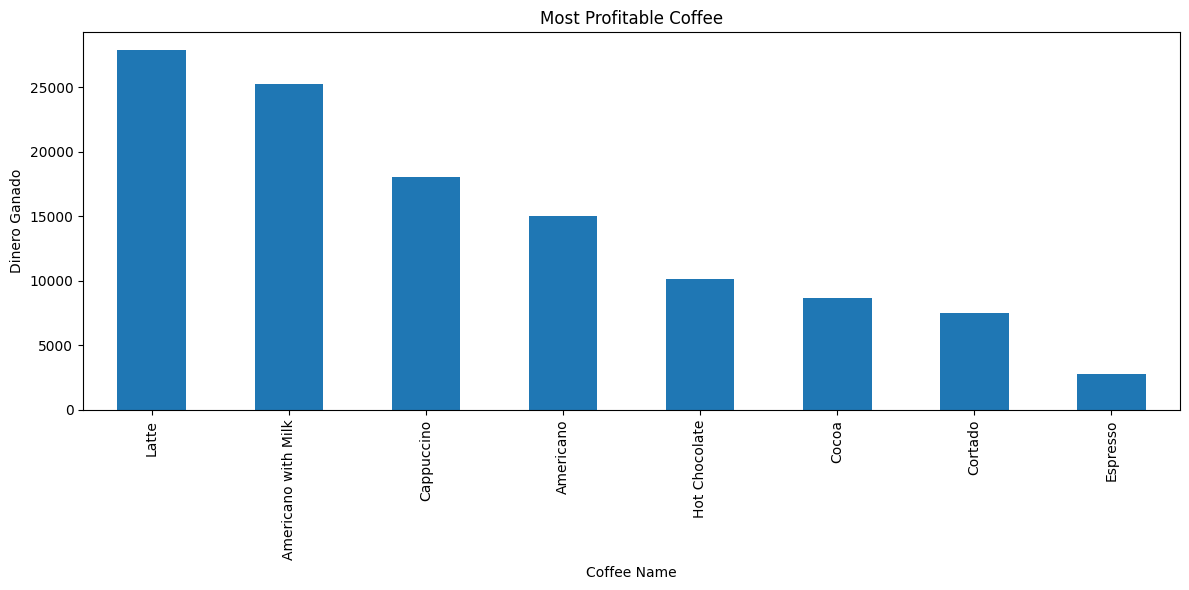

In [61]:
ganancia_por_cafe = df1.groupby('coffee_name')['money'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
ganancia_por_cafe.plot(kind='bar')
plt.title('Most Profitable Coffee')
plt.xlabel('Coffee Name')
plt.ylabel('Dinero Ganado')
plt.tight_layout()
plt.show()

## Ganancia por cafe 💵
coffee name: 
- Latte                  $27,866.30
- Americano with Milk    $25,269.12
- Cappuccino             $18,034.14
- Americano              $15,062.26
- Hot Chocolate          $10,172.46
- Cocoa                   $8,678.16
- Cortado                 $7,534.86
- Espresso                $2,814.28

podemos meter alguna promocion a los ultimos 3 para que puedan generar mas tickets, y llegar a alcanzar un 5% mas

In [43]:
dinero_generado = df1['money'].sum()
print(f'Total money generated in Index 1: {dinero_generado}')
dinero_generado_2 = df2['money'].sum()
print(f'Total money generated in Index 2: {dinero_generado_2}')
dinero_total = dinero_generado + dinero_generado_2
print(f'Total money generated in both indices: {dinero_total}')

Total money generated in Index 1: 115431.58
Total money generated in Index 2: 6890.0
Total money generated in both indices: 122321.58


## La empresa tuvo una ganacia en 1 mes de $122,321.58

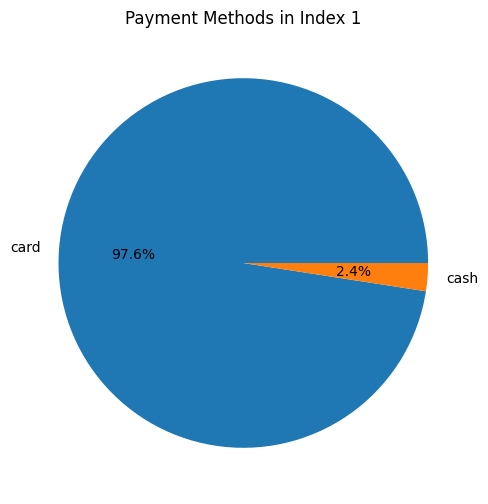

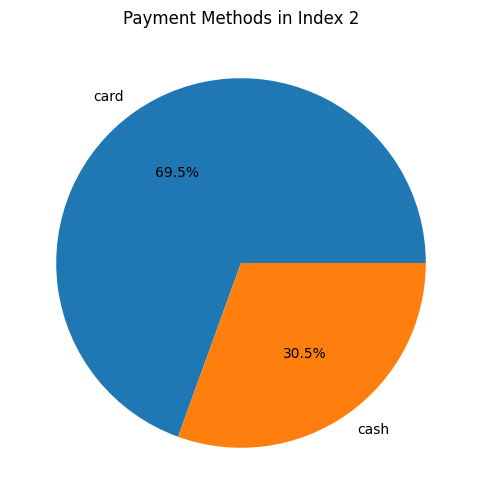

In [50]:
# Comparación de métodos de pago entre los dos índices pie chart
plt.figure(figsize=(12, 6))
df1['cash_type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Payment Methods in Index 1')
plt.ylabel('')
plt.show()
plt.figure(figsize=(12, 6))
df2['cash_type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Payment Methods in Index 2')
plt.ylabel('')
plt.show()

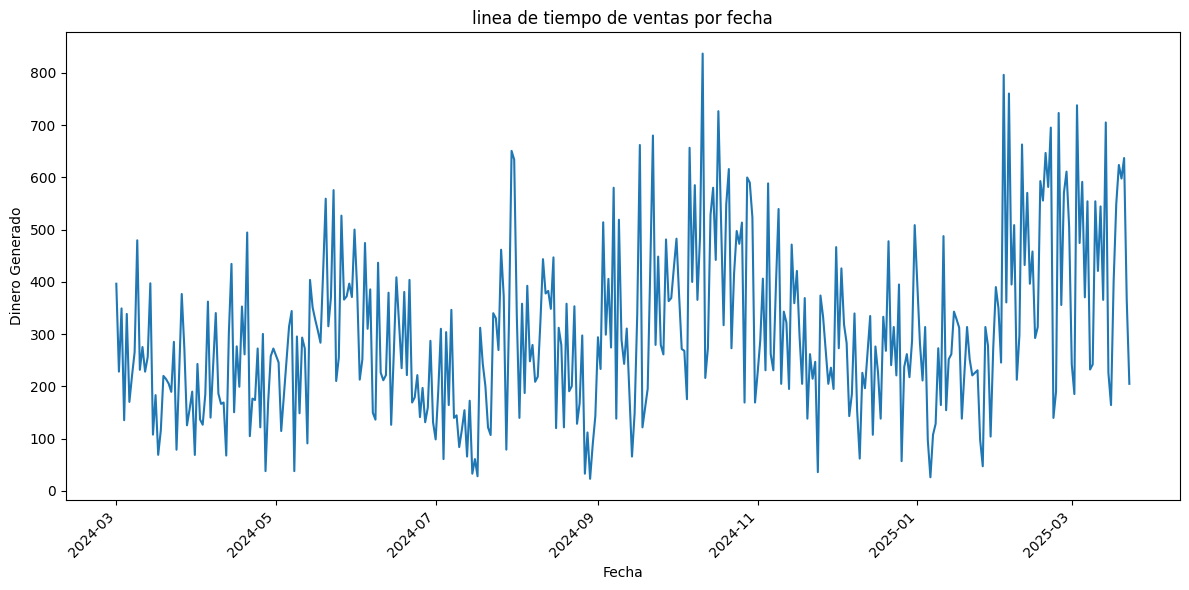

In [60]:
# linea de tiempo de ventas por fecha
plt.figure(figsize=(12, 6))
df1.groupby('date')['money'].sum().plot(kind='line')
plt.title('linea de tiempo de ventas por fecha')
plt.xlabel('Fecha')
plt.ylabel('Dinero Generado')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [76]:
card_most_popular = df1.groupby('card')['money'].count().sort_values(ascending=False)
card_most_popular = card_most_popular[card_most_popular > 20]
print(card_most_popular)

card
ANON-0000-0000-0012    129
ANON-0000-0000-0141    108
Unknown                 89
ANON-0000-0000-1163     77
ANON-0000-0000-0276     69
ANON-0000-0000-0009     67
ANON-0000-0000-0507     51
ANON-0000-0000-0040     50
ANON-0000-0000-0097     47
ANON-0000-0000-1110     33
ANON-0000-0000-1170     32
ANON-0000-0000-0003     31
ANON-0000-0000-0570     30
ANON-0000-0000-1191     27
ANON-0000-0000-1152     23
ANON-0000-0000-0206     23
ANON-0000-0000-0333     22
ANON-0000-0000-0019     21
Name: money, dtype: int64


## Clientes frecuentes un descuento por fielidad
un descuento del 15 o 20% de agradecimiento por elegirnos y incentivar a los nuevos clientes con ese descuento que sea escalable, en el nivel 1 quizas el 5% en el nivel 2 sube y asi progresivamente hasta llegar a 20 o 15 estos son algunos de nuestros clientes con mas de 20 compras en el mes, estamos hablando que minimo 1 vez por dia entre semana nos visitan 
card
- ANON-0000-0000-0012    129
- NON-0000-0000-0141    108
- Unknown                 89
- ANON-0000-0000-1163     77
- ANON-0000-0000-0276     69
- ANON-0000-0000-0009     67
- ANON-0000-0000-0507     51
- ANON-0000-0000-0040     50
- ANON-0000-0000-0097     47
- ANON-0000-0000-1110     33
- ANON-0000-0000-1170     32
- ANON-0000-0000-0003     31
- ANON-0000-0000-0570     30
- ANON-0000-0000-1191     27
- ANON-0000-0000-1152     23
- ANON-0000-0000-0206     23
- ANON-0000-0000-0333     22
- ANON-0000-0000-0019     21


## Conclusiones generales
- El negocio del cafe va super bien con ganacias de mas de $100k en un mes es super bueno con un gran marge de ganacia

- Las ventas diarias en un grafico mensual nos da a entender que ha ido creciendo bien pero podria ser mejor con un un plan de marketing, como el planea el descuento para clientes frecuentes, el agregar mas variades de cafes y a su vez comida rapida algo como panes, sandwichs y demas

- Hay que ir rotando mas los productos como el ejemplo del Espresso agregar una promocion y ver que tanto influye en 1 mes mas, si no rotar por otra alternativa

- Un 32.9% es pago con tarjeta eso indica que la mayoria de los clientes usan tarjeta, entonces podemos ofrecer una consola con pago sin contacto, agregar metodos de pago en las cuales puedan usar como uber, rappi, didi y demas plataformas 